#  Restaurant Food Cost

Project Description

Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.

You are provided with following 2 files:

train.csv : Use this dataset to train the model. This file contains all the details related to restaurant food cost as well as the target variable “cost”. You have to train your model using this file.
test.csv : Use the trained model to predict the cost of a two person meal.

In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [100]:
FC_train = pd.read_excel('Data_Train.xlsx')
FC_test = pd.read_excel('Data_Test.xlsx')


In [101]:
FC_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [102]:
FC_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,NaN,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [103]:
a = np.log(FC_train['COST'])

In [104]:
FC_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          11687 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [105]:
FC_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          3947 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [106]:
(FC_train['TITLE'].nunique())


112

In [107]:
(FC_train['CITY'].nunique())

359

In [108]:
(FC_train['RESTAURANT_ID'].nunique())

11892

In [109]:
(FC_train['TIME'].nunique())

2689

In [110]:
(FC_train['LOCALITY'].nunique())

1416

In [111]:
(FC_train['RATING'].nunique())

32

In [112]:
(FC_train['VOTES'].nunique())

1847

<Axes: xlabel='RATING'>

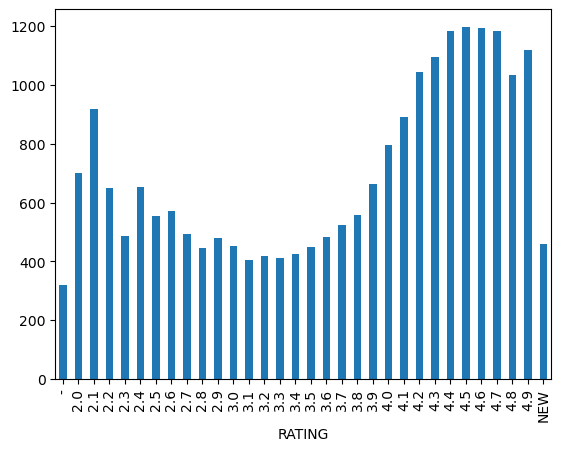

In [113]:
FC_train.groupby(['RATING'])['COST'].mean().plot(kind='bar')

<Axes: xlabel='RATING'>

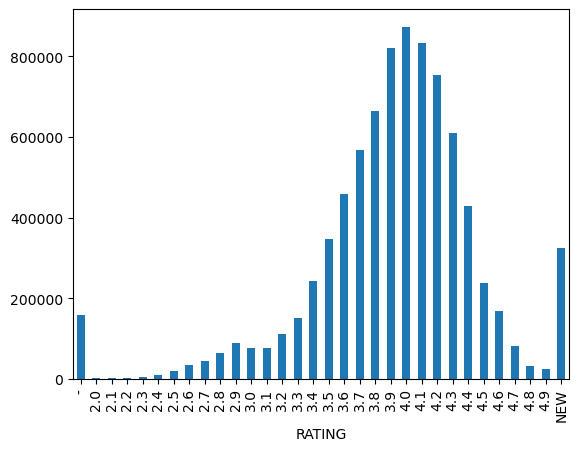

In [114]:

FC_train.groupby(['RATING'])['COST'].sum().plot(kind='bar')

In [115]:

FC_train['CITY'].value_counts()

CITY
Chennai                                                                           2174
Bangalore                                                                         2149
Hyderabad                                                                         1819
Mumbai                                                                            1722
New Delhi                                                                         1321
                                                                                  ... 
Gachibowli Hyderabad                                                                 1
CPR layout harlur main road opposite to ozone ever green apartment Bangalore -       1
ECR NEELANKARAI Chennai 600115                                                       1
ward X11                                                                             1
Masab Tank                                                                           1
Name: count, Length: 359, dtype: int64

In [116]:
FC_train[FC_train['CITY'] == 'Mumbai']['COST'].mean()

865.2729384436701

In [117]:
FC_train[FC_train['CITY'] == 'Chennai']['COST'].mean()

588.5878564857405

In [118]:
FC_train[FC_train['CITY'] == 'Bangalore']['COST'].mean()

668.733829688227

In [119]:
FC_train[FC_train['CITY'] == 'Hyderabad']['COST'].mean()

595.1786695986806

In [120]:
FC_train[FC_train['CITY'] == 'New Delhi']['COST'].mean()

782.9825889477669

In [121]:
FC_train['RATING'] = FC_train['RATING'].astype('object')
# for test set
FC_test['RATING'] = FC_test['RATING'].astype('object')

In [122]:
FC_train['RATING'].value_counts(),FC_test['RATING'].value_counts()

(RATING
 3.9    1238
 3.8    1190
 4.0    1099
 3.7    1086
 3.6     951
 4.1     936
 3.5     771
 4.2     723
 NEW     707
 3.4     575
 4.3     556
 -       495
 3.3     365
 4.4     362
 3.2     266
 4.5     199
 2.9     186
 3.1     186
 3.0     170
 2.8     146
 4.6     141
 2.7      89
 4.7      69
 2.6      61
 2.5      35
 4.8      32
 4.9      22
 2.4      15
 2.3      10
 2.1       3
 2.0       2
 2.2       2
 Name: count, dtype: int64,
 RATING
 3.8    414
 3.9    405
 4.0    399
 3.7    351
 3.6    310
 4.1    281
 4.2    245
 NEW    223
 3.5    217
 3.4    202
 4.3    184
 -      177
 4.4    122
 3.3    120
 3.2     83
 3.1     77
 4.5     75
 3.0     59
 2.9     56
 2.8     45
 4.6     43
 2.7     40
 2.6     24
 4.7     21
 4.8     17
 2.5     16
 2.4      9
 4.9      6
 2.3      5
 2.2      2
 2.1      1
 Name: count, dtype: int64)

In [123]:
FC_train['RATING'] = FC_train['RATING'].replace({'-':0.0, 'NEW':5.0}) # replace the rating
# for test set
FC_test['RATING'] = FC_test['RATING'].replace({'-':0.0, 'NEW':5.0}) # replace the rating

In [124]:

FC_train['RATING'].describe()

count     12688
unique       32
top         3.9
freq       1238
Name: RATING, dtype: object

In [125]:
FC_train['RATING'] = FC_train['RATING'].astype(float) # replace the rating
# for test set
FC_test['RATING'] = FC_test['RATING'].astype(float) 

In [126]:

FC_train.isnull().sum()

TITLE            1003
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [127]:

FC_test.isnull().sum()

TITLE            284
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [128]:
FC_train['source']= 'train'
FC_test['source'] = 'test'

In [129]:

Res_data=pd.concat([FC_train, FC_test],ignore_index=True)

In [130]:
Res_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,train
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,train
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,train
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,train
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,train


In [131]:

FoodNew_test = Res_data["VOTES"].str.split(" ", n = 1, expand =True) 

In [132]:
Res_data['votes_no'] = FoodNew_test[0]
Res_data['votes'] = FoodNew_test[1]

In [133]:
Res_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,source,votes_no,votes
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200.0,train,49,votes
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500.0,train,30,votes
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800.0,train,221,votes
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800.0,train,24,votes
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300.0,train,165,votes


In [134]:
Res_data['votes_no'] =Res_data['votes_no'].astype(float) 

Missing Values with Mean and Mode

In [135]:
Res_data['votes_no'] = Res_data['votes_no'].fillna(44.0) # filling with mode

In [136]:
Res_data['RATING'] = Res_data['RATING'].fillna(3.8) # filling with the median 

In [137]:
Res_data['LOCALITY'] = Res_data['LOCALITY'].fillna('Gachibowli')

In [138]:
Res_data['CITY'] = Res_data['CITY'].fillna('Chennai')

In [158]:
Res_data['TITLE'] = Res_data['TITLE'].fillna('CASUAL DINING')

Dropping Values

In [139]:
Res_data = Res_data.drop(['VOTES', 'votes'], axis=1)

In [140]:
Res_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,COST,source,votes_no
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,1200.0,train,49.0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,1500.0,train,30.0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,800.0,train,221.0
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,800.0,train,24.0
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,300.0,train,165.0


Data Featuring 

In [159]:
Res_data['title_rat'] = Res_data['TITLE'].map(Res_data.groupby('TITLE')['RATING'].mean())
Res_data['title_rat_C'] = Res_data['TITLE'].map(Res_data.groupby('TITLE')['RATING'].count())
Res_data['city_rat'] = Res_data['CITY'].map(Res_data.groupby('CITY')['RATING'].mean())
Res_data['city_rat_C'] = Res_data['CITY'].map(Res_data.groupby('CITY')['RATING'].count())
Res_data['cuisine_rat'] = Res_data['CUISINES'].map(Res_data.groupby('CUISINES')['RATING'].mean())
Res_data['cuisine_rat_C'] = Res_data['CUISINES'].map(Res_data.groupby('CUISINES')['RATING'].count())

In [160]:

Res_data['rest_id'] = Res_data['RESTAURANT_ID'].map(Res_data.groupby('RESTAURANT_ID')['RATING'].count())
Res_data['rest_id_votes'] = Res_data['RESTAURANT_ID'].map(Res_data.groupby('RESTAURANT_ID')['votes_no'].count())

In [161]:
Res_data['title_rat_sum'] = Res_data['TITLE'].map(Res_data.groupby('TITLE')['RATING'].sum())
Res_data['title_rat_C_sum'] = Res_data['TITLE'].map(Res_data.groupby('TITLE')['RATING'].sum())
Res_data['city_rat_sum'] = Res_data['CITY'].map(Res_data.groupby('CITY')['RATING'].sum())
Res_data['city_rat_C_sum'] = Res_data['CITY'].map(Res_data.groupby('CITY')['RATING'].sum())
Res_data['cuisine_rat_sum'] = Res_data['CUISINES'].map(Res_data.groupby('CUISINES')['RATING'].sum())
Res_data['cuisine_rat_C_sum'] = Res_data['CUISINES'].map(Res_data.groupby('CUISINES')['RATING'].sum())

In [162]:

Res_data['rat_vote'] = Res_data['RATING'] * Res_data['votes_no']

Converting Categorical Data into Numerical Data

In [163]:
cols = ('CUISINES', 'TIME', 'LOCALITY', 'TITLE', 'CITY')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(Res_data[c].values)) 
    Res_data[c] = lbl.transform(list(Res_data[c].values))

# shape        
print('Shape all_data: {}'.format(Res_data.shape))

Shape all_data: (16921, 25)


In [164]:

Res_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,COST,source,votes_no,...,cuisine_rat_C,rest_id,rest_id_votes,title_rat_sum,title_rat_C_sum,city_rat_sum,city_rat_C_sum,cuisine_rat_sum,cuisine_rat_C_sum,rat_vote
0,34,9438,3294,898,400,328,3.6,1200.0,train,49.0,...,1,1,1,17928.8,17928.8,490.4,490.4,3.6,3.6,176.4
1,36,13198,364,2301,75,1214,4.2,1500.0,train,30.0,...,1,2,2,1897.8,1897.8,10974.7,10974.7,4.2,4.2,126.0
2,34,10915,3729,806,75,1272,3.8,800.0,train,221.0,...,4,1,1,17928.8,17928.8,10974.7,10974.7,14.6,14.6,839.8
3,103,6346,5156,340,277,161,4.1,800.0,train,24.0,...,3,1,1,20224.2,20224.2,9289.8,9289.8,12.2,12.2,98.4
4,55,15387,2218,750,277,709,3.8,300.0,train,165.0,...,117,1,1,1888.6,1888.6,9289.8,9289.8,407.1,407.1,627.0


In [165]:

FC_Train = Res_data.loc[Res_data['source']=='train']
FC_Test = Res_data.loc[Res_data['source']=='test']

In [166]:

FC_Train.drop('source',axis=1,inplace=True)
FC_Test.drop(['source','COST'],axis=1,inplace=True)

In [167]:
FC_Train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,COST,votes_no,title_rat,...,cuisine_rat_C,rest_id,rest_id_votes,title_rat_sum,title_rat_C_sum,city_rat_sum,city_rat_C_sum,cuisine_rat_sum,cuisine_rat_C_sum,rat_vote
0,34,9438,3294,898,400,328,3.6,1200.0,49.0,3.651487,...,1,1,1,17928.8,17928.8,490.4,490.4,3.6,3.6,176.4
1,36,13198,364,2301,75,1214,4.2,1500.0,30.0,4.098920,...,1,2,2,1897.8,1897.8,10974.7,10974.7,4.2,4.2,126.0
2,34,10915,3729,806,75,1272,3.8,800.0,221.0,3.651487,...,4,1,1,17928.8,17928.8,10974.7,10974.7,14.6,14.6,839.8
3,103,6346,5156,340,277,161,4.1,800.0,24.0,3.589670,...,3,1,1,20224.2,20224.2,9289.8,9289.8,12.2,12.2,98.4
4,55,15387,2218,750,277,709,3.8,300.0,165.0,3.717717,...,117,1,1,1888.6,1888.6,9289.8,9289.8,407.1,407.1,627.0


In [168]:
FC_Test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,votes_no,title_rat,title_rat_C,...,cuisine_rat_C,rest_id,rest_id_votes,title_rat_sum,title_rat_C_sum,city_rat_sum,city_rat_C_sum,cuisine_rat_sum,cuisine_rat_C_sum,rat_vote
12690,34,4085,3878,1417,323,1314,4.3,564.0,3.651487,4910,...,2,1,1,17928.8,17928.8,1115.9,1115.9,8.3,8.3,2425.2
12691,103,12680,4879,2548,277,429,4.2,61.0,3.589670,5634,...,1,1,1,20224.2,20224.2,9289.8,9289.8,4.2,4.2,256.2
12692,34,1411,4333,614,277,774,3.8,350.0,3.651487,4910,...,1,1,1,17928.8,17928.8,9289.8,9289.8,3.8,3.8,1330.0
12693,122,204,631,2955,128,846,3.8,1445.0,3.895726,1287,...,164,1,1,5013.8,5013.8,423.9,423.9,586.0,586.0,5491.0
12694,103,13453,4891,586,216,570,3.6,23.0,3.589670,5634,...,32,1,1,20224.2,20224.2,4194.4,4194.4,100.9,100.9,82.8


In [169]:
FC_Train.isnull().sum()

TITLE                0
RESTAURANT_ID        0
CUISINES             0
TIME                 0
CITY                 0
LOCALITY             0
RATING               0
COST                 0
votes_no             0
title_rat            0
title_rat_C          0
city_rat             0
city_rat_C           0
cuisine_rat          0
cuisine_rat_C        0
rest_id              0
rest_id_votes        0
title_rat_sum        0
title_rat_C_sum      0
city_rat_sum         0
city_rat_C_sum       0
cuisine_rat_sum      0
cuisine_rat_C_sum    0
rat_vote             0
dtype: int64

Data Splitting

In [170]:
X =FC_Train.drop('COST', axis=1)
y = a

In [171]:
from sklearn.linear_model import Ridge

In [172]:
r=Ridge()


In [173]:
r.fit(X,y)

Ridge()

In [175]:
pred = r.predict(X)
pred

array([6.56073027, 6.96852881, 6.50567373, ..., 6.81434814, 6.47644051,
       6.39707926])

In [189]:
r = Ridge(alpha=0.00001)
r.fit(X,y)
print(ls.coef_)
print('Score:',ls.score(X,y))

[-7.56075713e-03  3.40229908e-06  2.02966902e-05 -7.06115493e-06
  1.11314599e-04 -3.05024682e-07  2.56600717e-02  6.06093484e-04
  1.75707054e+00 -1.42476742e-04  1.15619292e-01  1.28108324e-05
  1.25283443e-01 -2.67979242e-03 -1.29728342e-03 -5.76328041e-18
  5.61169125e-05  3.91309593e-20 -5.10949295e-06 -0.00000000e+00
  6.51952373e-04  0.00000000e+00 -1.16196345e-04]
Score: 0.4797232869883984


In [177]:
x_test = FC_Test

In [178]:

test_pred = r.predict(x_test)

In [179]:
# Converting price back to original scale and making it integer
Predict=np.exp(test_pred)
Predict=Predict.astype(int)

In [181]:
a =pd.DataFrame(Predict, columns=['COST'])
a

,COST
0,789
1,404
2,727
3,476
4,291
...,...
4226,731
4227,461
4228,360
4229,244


In [182]:
a.to_excel('cost1.xlsx')

In [184]:
ls = Lasso(alpha=0.00001)
ls.fit(X,y)
print(ls.coef_)
print('Score:',ls.score(X,y))

[-7.56075713e-03  3.40229908e-06  2.02966902e-05 -7.06115493e-06
  1.11314599e-04 -3.05024682e-07  2.56600717e-02  6.06093484e-04
  1.75707054e+00 -1.42476742e-04  1.15619292e-01  1.28108324e-05
  1.25283443e-01 -2.67979242e-03 -1.29728342e-03 -5.76328041e-18
  5.61169125e-05  3.91309593e-20 -5.10949295e-06 -0.00000000e+00
  6.51952373e-04  0.00000000e+00 -1.16196345e-04]
Score: 0.4797232869883984


In [186]:
test_pred = ls.predict(FC_Test)

In [187]:
Predict=np.exp(test_pred)
Predict=Predict.astype(int)

In [188]:
Lasso_perf =pd.DataFrame(Predict, columns=['COST2'])
Lasso_perf 

,COST2
0,779
1,411
2,719
3,453
4,296
...,...
4226,723
4227,439
4228,364
4229,248


In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1994)

In [207]:
Lr=LinearRegression()
knn=KNeighborsRegressor()
Dtr=DecisionTreeRegressor()
Bag=BaggingRegressor()
Rfg=RandomForestRegressor()
Ada=AdaBoostRegressor()
Gbr=GradientBoostingRegressor()
lasso=Lasso()
ridge=Ridge()
model=(Lr,knn,Dtr,Bag,Rfg,Ada,Gbr,lasso,ridge)
for m in model:
    m.fit(X_train,y_train)
    predict=m.predict(X_test)
    r1=r2_score(y_test,predict)
    print('R2 score of  :',m,r1)
    print('Mean Absolute Error is :',mean_absolute_error(y_test,predict))
    print('Mean Squared Error is :',mean_squared_error(y_test,predict))
    print('Root Mean Squared Error is :',np.sqrt(mean_squared_error(y_test,predict)))
    print('\n')

R2 score of  : LinearRegression() 0.4578888280866922
Mean Absolute Error is : 0.3919225876950427
Mean Squared Error is : 0.27618280873328854
Root Mean Squared Error is : 0.5255309779007215


R2 score of  : KNeighborsRegressor() 0.3852519431395234
Mean Absolute Error is : 0.4129597449547229
Mean Squared Error is : 0.31318824219731956
Root Mean Squared Error is : 0.5596322383470412


R2 score of  : DecisionTreeRegressor() 0.45836990779321096
Mean Absolute Error is : 0.4053465452277635
Mean Squared Error is : 0.2759377188855696
Root Mean Squared Error is : 0.5252977430805977


R2 score of  : BaggingRegressor() 0.6921359723859983
Mean Absolute Error is : 0.30319347894946463
Mean Squared Error is : 0.1568437550443524
Root Mean Squared Error is : 0.39603504269742645


R2 score of  : RandomForestRegressor() 0.7280544857568712
Mean Absolute Error is : 0.28468422873525306
Mean Squared Error is : 0.13854478534542464
Root Mean Squared Error is : 0.37221604659851065


R2 score of  : AdaBoostRegres

In [209]:
rfg_pred =Rfg.predict(X_test)

In [210]:
Predict_rfg=np.exp(rfg_pred)
Predict_rfg=Predict_rfg.astype(int)

In [213]:
RandomForestRegressor_perf =pd.DataFrame(Predict_rfg, columns=['COST3'])
RandomForestRegressor_perf

,COST3
0,385
1,620
2,629
3,975
4,1586
...,...
2533,301
2534,318
2535,2571
2536,416


The Model "Random Forest Regressor " works best with R2 score a 0.7280544857568712